In [3]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)


# importing necesary packages
import numpy as np
import pandas as pd
import pickle
import itertools
import timeit
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm

from matplotlib import ticker
import shapely.wkt as wkt
import shapely 
import imageio
import os
from pathlib import Path

# graphing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams

# modeling libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Replace 'your_pickle_file.pkl' with the path to your pickle file
file_path = 'cleaned_df.pkl'

# Open the file in read-binary ('rb') mode
with open(file_path, 'rb') as file:
    # Load the data from the file into a variable
    df = pickle.load(file)

# Ensure that the loaded data is a DataFrame
if isinstance(df, pd.DataFrame):
    # df is a pandas DataFrame
    print(df.head())
else:
    raise TypeError("Loaded data is not a pandas DataFrame.")

         ID Case Number                Date                 Block  IUCR  \
2  13203321    JG415333 2023-09-06 17:00:00      002XX N Wells st  1320   
3  13210088    JG423627 2023-08-31 12:00:00  023XX W JACKSON BLVD  1153   
4  13210004    JG422532 2023-07-24 21:45:00  073XX S JEFFERY BLVD  0281   
5  13210062    JG423596 2023-08-27 07:00:00  034XX N LAWNDALE AVE  0820   
6  13210107    JG411849 2023-09-04 21:30:00     053XX S HOMAN AVE  1310   

              Primary Type                          Description  \
2          CRIMINAL DAMAGE                           TO VEHICLE   
3       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
4  CRIMINAL SEXUAL ASSAULT                       NON-AGGRAVATED   
5                    THEFT                       $500 AND UNDER   
6          CRIMINAL DAMAGE                          TO PROPERTY   

                     Location Description  Arrest  Domestic  Beat  District  \
2  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False   122  

In [5]:
cleaned_df = df

In [6]:
cleaned_df_copy = cleaned_df.copy()    

In [7]:
cleaned_df_copy

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month,Day,Hour,Weekday
2,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,14,1174694.0,1901831.0,2023,2023-11-04 15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)",14309.0,38,92.0,36.0,46.0,22.0,79.0,9,6,17,2
3,13210088,JG423627,2023-08-31 12:00:00,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,1225,12.0,11,1160870.0,1898642.0,2023,2023-09-16 15:41:56,41.877565,-87.684791,"(41.877565108, -87.68479102)",21184.0,29,766.0,46.0,28.0,15.0,139.0,8,31,12,3
4,13210004,JG422532,2023-07-24 21:45:00,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,333,3.0,02,1190812.0,1856743.0,2023,2023-09-16 15:41:56,41.761919,-87.576209,"(41.7619185, -87.576209245)",22538.0,39,419.0,37.0,24.0,18.0,89.0,7,24,21,0
5,13210062,JG423596,2023-08-27 07:00:00,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,1732,17.0,06,1151117.0,1922554.0,2023,2023-09-16 15:41:56,41.943379,-87.719974,"(41.943378528, -87.7199738)",21538.0,22,138.0,21.0,39.0,1.0,20.0,8,27,7,6
6,13210107,JG411849,2023-09-04 21:30:00,053XX S HOMAN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,822,8.0,14,1154617.0,1869046.0,2023,2023-09-16 15:41:56,41.796477,-87.708541,"(41.796477414, -87.708540915)",22248.0,61,776.0,8.0,56.0,13.0,129.0,9,4,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930141,13047495,JG229914,2023-04-18 08:00:00,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,11,1172269.0,1902384.0,2023,2023-08-19 15:40:26,41.887589,-87.642827,"(41.887589411, -87.642826595)",4452.0,29,784.0,36.0,45.0,15.0,76.0,4,18,8,1
7930142,13168300,JG373901,2023-08-07 18:00:00,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,03,1177527.0,1841973.0,2023,2023-08-19 15:40:26,41.721698,-87.625345,"(41.72169837, -87.625345212)",21861.0,45,187.0,13.0,59.0,20.0,242.0,8,7,18,0
7930143,13114024,JG309527,2023-06-20 19:00:00,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,07,1151205.0,1883542.0,2023,2023-08-19 15:40:26,41.836324,-87.720674,"(41.836323827, -87.720674149)",21569.0,32,200.0,28.0,57.0,21.0,167.0,6,20,19,1
7930144,13188860,JG398340,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,14,1198338.0,1853426.0,2023,2023-09-02 15:41:45,41.752631,-87.548737,"(41.752631346, -87.548737069)",22538.0,42,505.0,37.0,24.0,19.0,225.0,8,26,0,5


In [8]:
cleaned_df_copy.shape

(6853765, 31)

In [9]:
community_areas = pd.read_csv('CommAreas.csv')
community_areas.head()

FileNotFoundError: [Errno 2] No such file or directory: 'CommAreas.csv'

In [ ]:
print(type(community_areas))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
community_areas['the_geom'] = community_areas['the_geom'].apply(lambda x: shapely.wkt.loads(x.strip()))  # Strip leading/trailing whitespace
comm = gpd.GeoDataFrame(community_areas, geometry='the_geom')
merged_df = comm.merge(df, left_on='AREA_NUMBE', right_on='Community Areas')

In [ ]:
print(type(community_areas['the_geom'].iloc[0]))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


#### Density Map by Community Area for 2003-2023

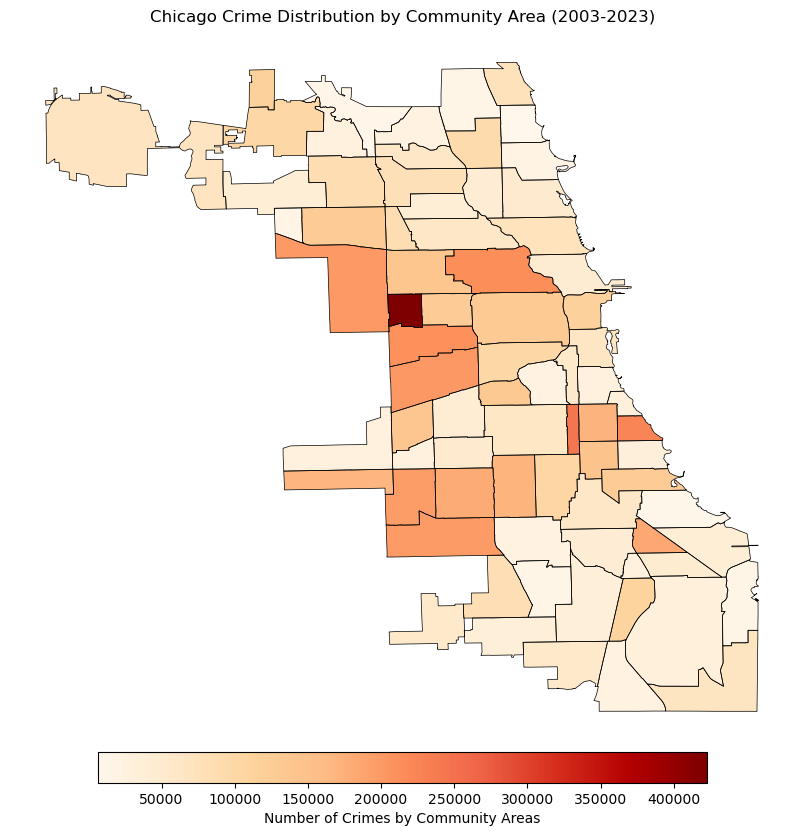

In [ ]:
# Create GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df.drop_duplicates('Community Areas'), geometry='the_geom')

# Replace 'community_area_id' with the actual column name
crime_data_agg = merged_df.groupby('Community Areas').size().reset_index(name='Crime Count')

# The key used for merging must be present in both DataFrames
merged_data = gdf.merge(crime_data_agg, left_on='AREA_NUMBE', right_on='Community Areas')

# Create the density heatmap for violent crimes by sector
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Outline the community areas
gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')

# Plot the crime count and adjust the legend
crime_count = merged_data.plot(column='Crime Count', ax=ax, legend=True, cmap='OrRd',
                               legend_kwds={'label': "Number of Crimes by Community Areas",
                                            'orientation': "horizontal", 'shrink': 0.7, 'pad': 0.01})
# Apply normalization to the color scale
norm = Normalize(vmin=merged_data['Crime Count'].min(), vmax=merged_data['Crime Count'].max())
# Create a formatter for the legend ticks
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
# Remove border and axes labels
ax.set_axis_off()

# Set the title
ax.set_title("Chicago Crime Distribution by Community Area (2003-2023)", fontsize=12)

# Tight layout to minimize white space
plt.tight_layout()
legend = ax.get_legend()
if legend:
    legend.set_title("Number of Crimes by Community Area", prop={'size': 10})
plt.show()

### Density Map by Community Area for 2003-2013

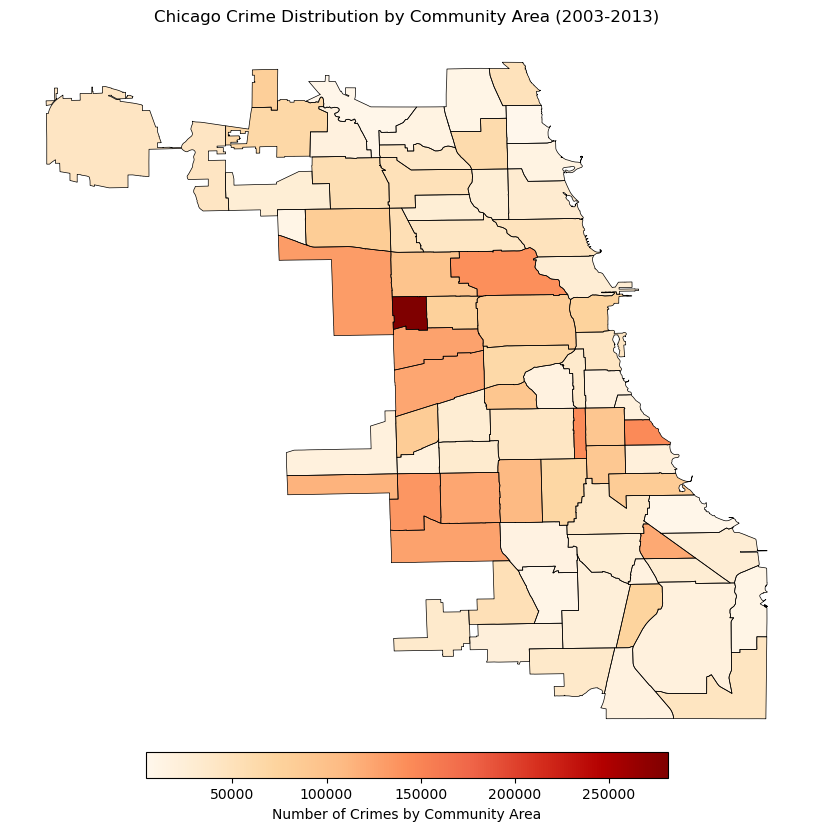

In [ ]:
# Filter the DataFrame for the years 2003-2013
filtered_df = merged_df[(merged_df['Year'] >= 2003) & (merged_df['Year'] <= 2013)]

# Create GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(filtered_df.drop_duplicates('Community Areas'), geometry='the_geom')

# Aggregate crime data for the filtered years
crime_data_agg = filtered_df.groupby('Community Areas').size().reset_index(name='Crime Count')

# The key used for merging must be present in both DataFrames
merged_data = gdf.merge(crime_data_agg, left_on='AREA_NUMBE', right_on='Community Areas')

# Define the color map boundaries including zero
max_crime_count = merged_data['Crime Count'].max()
boundaries = np.linspace(0, max_crime_count, 10)  # Adjust the number for desired number of intervals
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the density heatmap for violent crimes by sector
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Outline the community areas
gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')

crime_count = merged_data.plot(column='Crime Count', ax=ax, legend=True, cmap='OrRd',
                               legend_kwds={'label': "Number of Crimes by Community Area",'orientation': "horizontal",
                                            'shrink': 0.6, 'pad': 0.0})

# Set the title to indicate the years being visualized
ax.set_title("Chicago Crime Distribution by Community Area (2003-2013)", fontsize=12)

# Remove border and axes labels
ax.set_axis_off()

# Tight layout to minimize white space
plt.tight_layout()
# After plotting the map, adjust the legend label size
legend = ax.get_legend()
if legend:
    legend.set_title("Number of Crimes by Community Area", prop={'size': 10})

# Display the figure
plt.show()

### Density Map by Community Area for 2013-2023

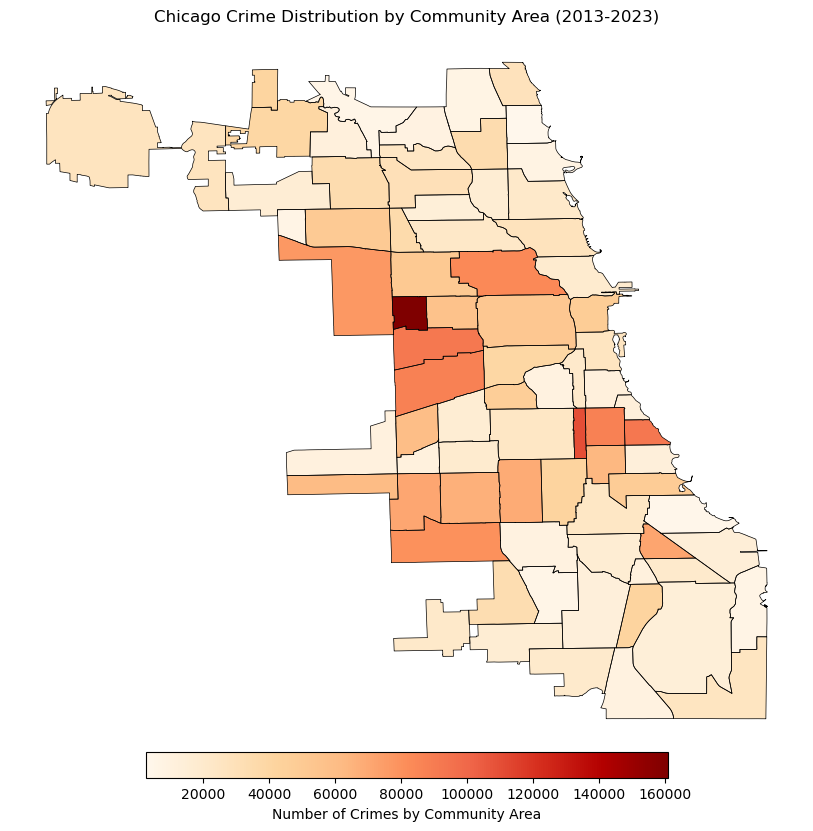

In [ ]:
# Filter the DataFrame for the years 2013-2013
filtered_df = merged_df[(merged_df['Year'] >= 2013) & (merged_df['Year'] <= 2023)]

# Create GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(filtered_df.drop_duplicates('Community Areas'), geometry='the_geom')

# Aggregate crime data for the filtered years
crime_data_agg = filtered_df.groupby('Community Areas').size().reset_index(name='Crime Count')

# The key used for merging must be present in both DataFrames
merged_data = gdf.merge(crime_data_agg, left_on='AREA_NUMBE', right_on='Community Areas')

# Define the color map boundaries including zero
max_crime_count = merged_data['Crime Count'].max()
boundaries = np.linspace(0, max_crime_count, 10)  # Adjust the number for desired number of intervals
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the density heatmap for violent crimes by sector
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Outline the community areas
gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')
crime_count = merged_data.plot(column='Crime Count', ax=ax, legend=True, cmap='OrRd',
                               legend_kwds={'label': "Number of Crimes by Community Area",'orientation': "horizontal",
                                            'shrink': 0.6, 'pad': 0.0})

# Set the title to indicate the years being visualized
ax.set_title("Chicago Crime Distribution by Community Area (2013-2023)", fontsize=12)

# Remove border and axes labels
ax.set_axis_off()

# Tight layout to minimize white space
plt.tight_layout()
# After plotting the map, adjust the legend label size
legend = ax.get_legend()
if legend:
    legend.set_title("Number of Crimes by Community Area", prop={'size': 10})

# Display the figure
plt.show()

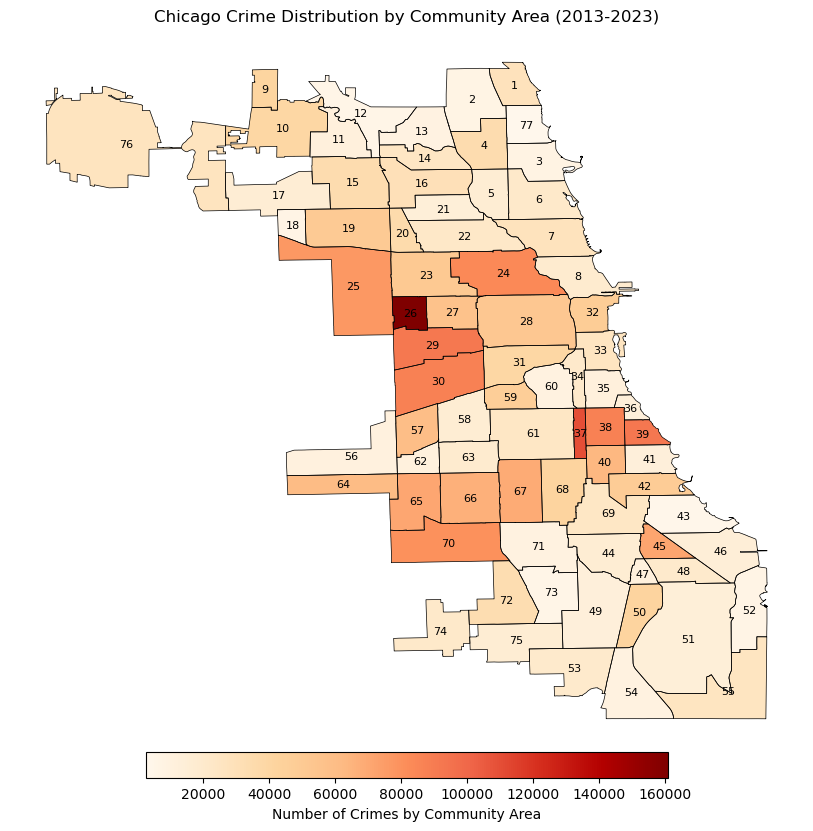

In [ ]:
# Filter the DataFrame for the years 2013-2023
filtered_df = merged_df[(merged_df['Year'] >= 2013) & (merged_df['Year'] <= 2023)]

# Create GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(filtered_df.drop_duplicates('Community Areas'), geometry='the_geom')

# Aggregate crime data for the filtered years
crime_data_agg = filtered_df.groupby('Community Areas').size().reset_index(name='Crime Count')

# The key used for merging must be present in both DataFrames
merged_data = gdf.merge(crime_data_agg, left_on='AREA_NUMBE', right_on='Community Areas')

# Define the color map boundaries including zero
max_crime_count = merged_data['Crime Count'].max()
boundaries = np.linspace(0, max_crime_count, 10)  # Adjust the number for desired number of intervals
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the density heatmap for violent crimes by sector
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Outline the community areas
gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')

# Plot the crime count
crime_count = merged_data.plot(column='Crime Count', ax=ax, legend=True, cmap='OrRd',
                               legend_kwds={'label': "Number of Crimes by Community Area", 'orientation': "horizontal",
                                            'shrink': 0.6, 'pad': 0.0})

# Add community area names on the map
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Community Areas']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Set the title to indicate the years being visualized
ax.set_title("Chicago Crime Distribution by Community Area (2013-2023)", fontsize=12)

# Remove border and axes labels
ax.set_axis_off()

# Tight layout to minimize white space
plt.tight_layout()

# After plotting the map, adjust the legend label size
legend = ax.get_legend()
if legend:
    legend.set_title("Number of Crimes by Community Area", prop={'size': 10})

# Display the figure
plt.show()


In [ ]:
# Filter the DataFrame for the years 2013-2023
filtered_df = merged_df[(merged_df['Year'] >= 2013) & (merged_df['Year'] <= 2023)]

# Create GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(filtered_df.drop_duplicates('Community Areas'), geometry='the_geom')

# Aggregate crime data for the filtered years
crime_data_agg = filtered_df.groupby('Community Areas').size().reset_index(name='Crime Count')

# Get the top 5 community areas with the highest reported crimes
top5_community_areas = crime_data_agg.nlargest(5, 'Crime Count')

# The key used for merging must be present in both DataFrames
merged_data = gdf.merge(top5_community_areas, left_on='AREA_NUMBE', right_on='Community Areas')
merged_data

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zip Codes,Community Areas_x,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month,Day,Hour,Weekday,Community Areas_y,Crime Count
0,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750,13208248,JG421395,2023-08-31 12:00:00,015XX N SEDGWICK ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1821,18.0,11,1173366.0,1910545.0,2023,2023-09-14 15:41:59,41.909959,-87.638555,"(41.909959349, -87.638555401)",14926.0,37,309.0,46.0,54.0,14.0,198.0,8,31,12,3,37,110084
1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906,13210004,JG422532,2023-07-24 21:45:00,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,333,3.0,02,1190812.0,1856743.0,2023,2023-09-16 15:41:56,41.761919,-87.576209,"(41.7619185, -87.576209245)",22538.0,39,419.0,37.0,24.0,18.0,89.0,7,24,21,0,39,92636
2,"MULTIPOLYGON (((-87.72024 41.86987, -87.72023 ...",0,0,0,0,26,WEST GARFIELD PARK,26,3.609285e+07,26238.541980,13158716,JG362691,2018-11-09 00:00:00,017XX N NASHVILLE AVE,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,2513,25.0,02,1132147.0,1910836.0,2018,2023-09-14 15:41:59,41.911574,-87.789972,"(41.911574252, -87.789972279)",4454.0,26,598.0,7.0,3.0,6.0,196.0,11,9,0,4,26,160897
3,"MULTIPOLYGON (((-87.72024 41.86987, -87.71965 ...",0,0,0,0,29,NORTH LAWNDALE,29,8.948742e+07,44959.459663,13210088,JG423627,2023-08-31 12:00:00,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,1225,12.0,11,1160870.0,1898642.0,2023,2023-09-16 15:41:56,41.877565,-87.684791,"(41.877565108, -87.68479102)",21184.0,29,766.0,46.0,28.0,15.0,139.0,8,31,12,3,29,91724
4,"MULTIPOLYGON (((-87.68740 41.83480, -87.68796 ...",0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210,13200739,JG412187,2023-09-05 14:51:00,033XX W DOUGLAS BLVD,041A,BATTERY,AGGRAVATED - HANDGUN,APARTMENT,False,True,1021,10.0,04B,1154115.0,1893253.0,2023,2023-09-14 15:41:59,41.862915,-87.709737,"(41.862914501, -87.709737438)",21569.0,30,34.0,14.0,57.0,21.0,153.0,9,5,14,1,30,87869


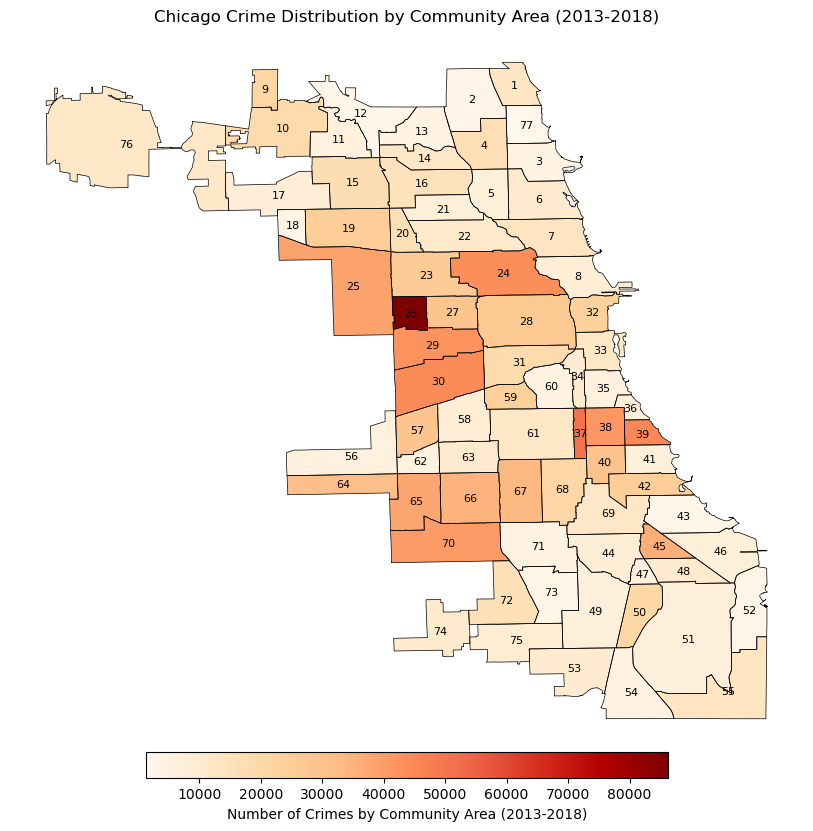

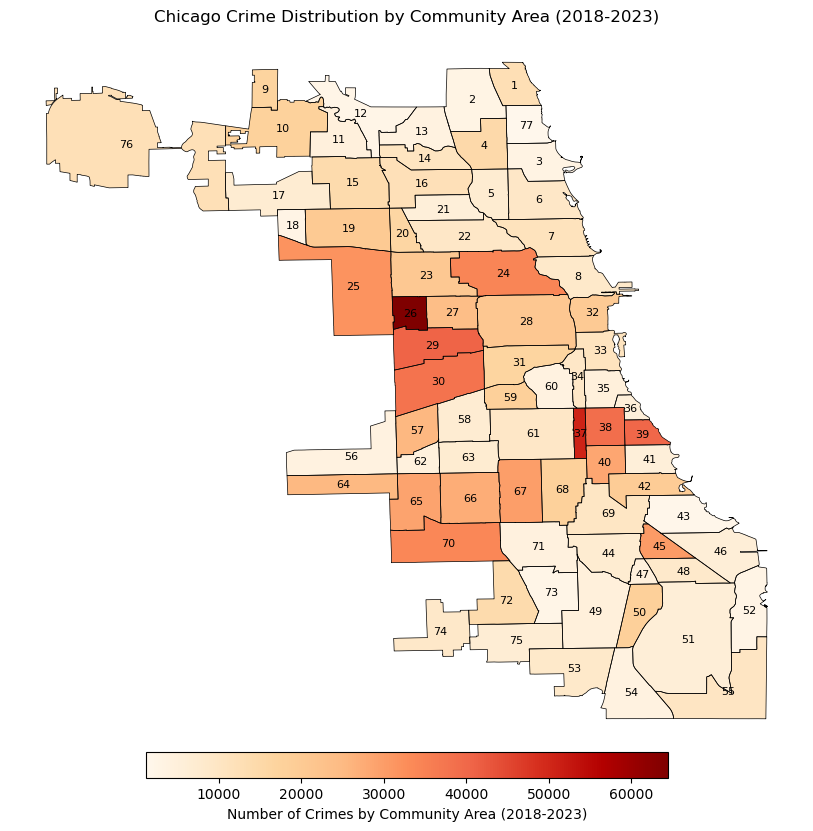

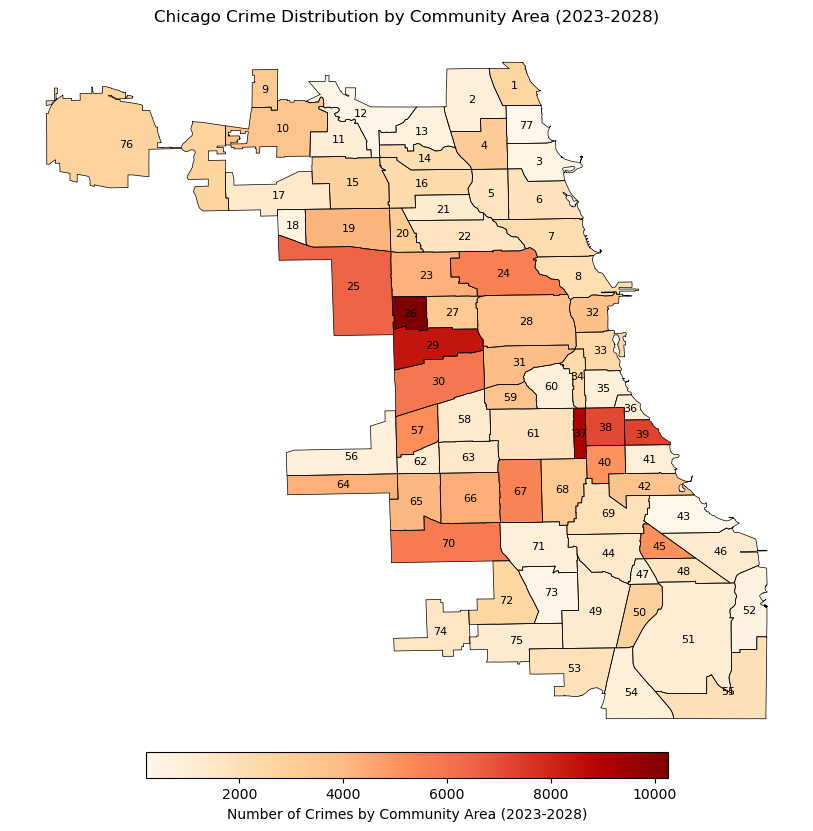

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm

# Assuming 'merged_df' is already defined and contains the necessary data
# and that 'merged_df' has columns 'Year' and 'Community Areas'

# Iterate over the range of years, stepping by 2 years at a time
for year in range(2013, 2024, 5):  # Goes until 2023
    # Filter the DataFrame for the current period (2-year span)
    filtered_df = merged_df[(merged_df['Year'] >= year) & (merged_df['Year'] < year + 5)]
    
    # Create GeoDataFrame from the filtered data
    gdf = gpd.GeoDataFrame(filtered_df.drop_duplicates('Community Areas'), geometry='the_geom')
    
    # Aggregate crime data for the filtered years
    crime_data_agg = filtered_df.groupby('Community Areas').size().reset_index(name='Crime Count')
    
    # The key used for merging must be present in both DataFrames
    merged_data = gdf.merge(crime_data_agg, left_on='AREA_NUMBE', right_on='Community Areas')
    
    # Define the color map boundaries including zero
    max_crime_count = merged_data['Crime Count'].max()
    boundaries = np.linspace(0, max_crime_count, 10)  # Adjust the number for desired number of intervals
    norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
    
    # Create the map for the current period
    fig, ax = plt.subplots(1, 1, figsize=(9, 9))
    gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')
    
    # Plot the crime count
    merged_data.plot(column='Crime Count', ax=ax, legend=True, cmap='OrRd',
                     legend_kwds={'label': f"Number of Crimes by Community Area ({year}-{year+5})",
                                  'orientation': "horizontal", 'shrink': 0.6, 'pad': 0.0})
    
    # Add community area names on the map
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Community Areas']):
        ax.text(x, y, label, fontsize=8, ha='center', va='center')
    
    # Set the title to indicate the years being visualized
    ax.set_title(f"Chicago Crime Distribution by Community Area ({year}-{year+5})", fontsize=12)
    
    # Remove border and axes labels
    ax.set_axis_off()
    
    # Tight layout to minimize white space
    plt.tight_layout()
    
    # After plotting the map, adjust the legend label size
    legend = ax.get_legend()
    if legend:
        legend.set_title(f"Number of Crimes by Community Area ({year}-{year+3})", prop={'size': 10})
    
    # Display the figure
    plt.show()
